# Properties transfer

A tutorial on kNN model application for properties transfer.

In this tutorial we demonstrate property transfer between two arbitrary grids. For special case of property transfer that is upscaling see [Grid](02.Grid.ipynb) and [Rock_and_States](03.Rock_and_States.ipynb) tutorials.

Required imports:

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')

from deepfield import Field, PropertiesTransfer

Load some model:

In [2]:
model = Field('../open_data/spe10model2/SPE10_MODEL2.DATA').load()

INFO:Field:Using default config.
INFO:Field:Start reading SPE10_MODEL2.DATA
INFO:Field:[SPE10_MODEL2.DATA:23] Loading TITLE
INFO:Field:[SPE10_MODEL2.DATA:26] Loading DIMENS
INFO:Field:[SPE10_MODEL2.DATA:33] Loading OIL
INFO:Field:[SPE10_MODEL2.DATA:35] Loading WATER
INFO:Field:[SPE10_MODEL2.DATA:37] Loading GAS
INFO:Field:[SPE10_MODEL2.DATA:40] Loading FIELD
INFO:Field:[SPE10_MODEL2.DATA:60] Loading START
INFO:Field:[SPE10_MODEL2.DATA:82] Loading DX
INFO:Field:[SPE10_MODEL2.DATA:84] Loading DY
INFO:Field:[SPE10_MODEL2.DATA:86] Loading DZ
...
INFO:Field:[SPE10_MODEL2.DATA:230] Loading COMPDAT
INFO:Field:[SPE10_MODEL2.DATA:238] Loading WCONINJE
INFO:Field:[SPE10_MODEL2.DATA:243] Loading WCONPROD
INFO:Field:Finish reading SPE10_MODEL2.DATA
INFO:Field:===== Field summary =====
INFO:Field:GRID attributes: MAPAXES, DIMENS, DX, DY, DZ, TOPS, ACTNUM
INFO:Field:ROCK attributes: PORO, PERMX, PERMY, PERMZ
INFO:Field:STATES attributes: 
INFO:Field:TABLES attributes: SWOF, SGOF, DENSITY, PVDO, PVTW

Let's make a new grid that will be shifted to some extent from original one:

In [3]:
new_grid = model.grid.to_corner_point()
new_grid.coord = new_grid.coord.astype(float) + 10
new_grid.create_vtk_grid()

Compute normalization vector (averaged cell sizes):

In [4]:
sizes = abs(np.diff(model.grid.bounding_box.reshape(-1, 3), axis=0))

Fit a model:

In [5]:
ptf = PropertiesTransfer().fit(model.grid, new_grid, n_neighbors=6, normalize_vector=sizes)

Apply the model to array of rock properties:

In [6]:
new_poro = ptf.predict(model.rock.poro)

Also we transfer active cells:

In [7]:
new_actnum = ptf.predict(model.grid.actnum) > 0.5

Compare histograms:

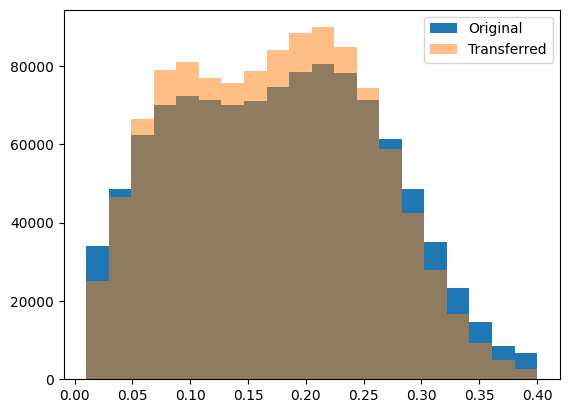

In [8]:
plt.hist(model.rock.poro[model.grid.actnum].ravel(),
         range=(0.01, 0.4), bins=20, label='Original')
plt.hist(new_poro[new_actnum].ravel(),
         range=(0.01, 0.4), bins=20, alpha=0.5, label='Transferred')
plt.legend()
plt.show()

Dump the model to recover it later:

In [9]:
ptf.dump('ptf_model')

PropertiesTransfer()

Load the saved model:

In [10]:
ptf = PropertiesTransfer().load('ptf_model.npz')

and continue to use it

In [11]:
ptf.predict(model.rock.poro).shape

(60, 220, 85)

The same model can be also applied to `State` properties.

Done! 